# Метрики для оценки качества регрессионной модели

---

Литература:

[Александр Дьяконов «Анализ малых данных» ГЛАВА 8. Метрики качества](https://alexanderdyakonov.files.wordpress.com/2018/10/book_08_metrics_12_blog1.pdf)


[3 Best metrics to evaluate Regression Model?](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)

[Metrics for Evaluating Linear Regression Models](https://medium.com/dev-genius/metrics-for-evaluating-linear-regression-models-36df305510d9)

[Как выбрать метрики для валидации результата Machine Learning](http://blog.datalytica.ru/2018/05/blog-post.html)

[Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

---

Метрики, которые вы выбираете для оценки ваших алгоритмов машинного обучения, очень важны.

Выбор метрик влияет на то, как измеряется и сравнивается производительность алгоритмов машинного обучения.
Они влияют на то, как вы оцениваете важность различных характеристик в результатах и ваш окончательный выбор того, какой алгоритм выбрать.

**Пакет Python: scikit-learn**

- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

Импортирт необходимых пакетов

In [17]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

## Средний модуль отклонения (MAE – Mean Absolute Error / MAD – Mean Absolute Deviation)

<center><img src="images/MAE.png" alt="MAE" width=300 height=300"/></center>

Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.

Модуль в формуле всё так же позволяет избавиться от знаков и получить некоторую оценку расстояния от фактических до расчётных значений, которое нужно будет потом минимизировать.

Не увеличивает в разы отклонения, считающиеся выбросами (outliners). 

Мера дает представление о величине ошибки, но не дает представление о направлении.

In [29]:
# Cross Validation Regression MAE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

kfold = model_selection.KFold(n_splits=10, random_state=None)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results.mean()
results.std()
# print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

MAE: %.3f (%.3f)


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

## Средний квадрат отклонения (MSE – Mean Squared Error)

<center><img src="images/MSE.png" alt="MSE" width=300 height=300"/></center>

Суть метода заключается по сути в том, чтобы минимизировать сумму квадратов отклонений фактических значений от расчётных (SSE - «Sum of Squared Errors»). Если полученную сумму разделить на число наблюдений, то получится та самая MSE.

Возведение в квадрат влияет на то, что 
- существенно увеличивает те значения, которые лежат далеко от всех остальных. Например, если продажи мороженого колеблются в основном в районе ста штук, но есть наблюдение в 200, то это наблюдение будет тянуть на себя одеяло — влиять существенно на оценки коэффициентов. 
- отрицательные значения не компенсируют положительными. 

**Чем меньше MSE, тем точнее наше предсказание**. Оптимум достигается в точке 0, то есть мы идеально предсказываем.

2.3899999999999997
0.75
[0.5 1. ]
0.85


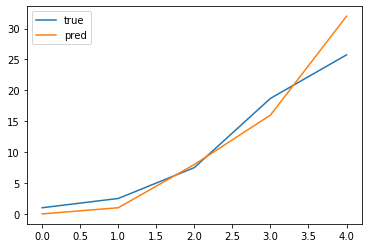

In [24]:
from sklearn.metrics import mean_absolute_error

y_true = [1.0, 2.5, 7.5, 18.7, 25.75]
y_pred = [0, 1, 8, 16, 32]
df = pd.DataFrame({'true': y_true, 'pred': y_pred}, index=[x for x in range(0, len(y_true))])
df.plot.line()
print(mean_absolute_error(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_absolute_error(y_true, y_pred))

print(mean_absolute_error(y_true, y_pred, multioutput='raw_values'))

print(mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))

## Корень среднего квадрата отклонения (RMSE – Root Mean Squared Error / RMSD – Root Mean Square Deviation)

<center><img src="images/RMSE.png" alt="RMSE" width=400 height=400"/></center>

Легко интерпретировать, поскольку он имеет те же единицы, что и исходные значения (в отличие от MSE). Также она оперирует меньшими величинами по абсолютному значению, что может быть полезно для вычисления на компьютере.

## Коэффициент детерминации ($R^2$ / R-squared)

<center><img src="images/R-squared.png" alt="R-squared" width=400 height=400"/></center>